<a href="https://colab.research.google.com/github/bcwein/1RT705APML-Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 5 A first Gibbs sampler

Want to estimate posterior

$$
p(s_1, s_2|y=1)
$$

And we know that $p(y=1)$ = $p(t>0)$.

so

$$
p(s_1, s_2|t>0)
$$

# Project in APML

Contributors:

- Bjørn Christian Weinbach
- Emil
- Markus

In [120]:
import numpy as np
import scipy.stats
import matplotlib.pyplot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def gibbsSampler(L, mu_s, sigma_s, burn=0):
    L = L

    # Initial Chain of values
    s1 = np.zeros(L)
    s2 = np.zeros(L)
    t = np.zeros(L)
    y = 1
    s1[0] = 10
    s2[0] = 10
    t[0] = 1

    # Hyperparameters
    sigma_s = sigma_s
    mu_s = mu_s
    sigma_ts = 1

    def corr1(sigmaa, A, sigmaba, mua, xb): 
        sigmaab = np.linalg.pinv(np.linalg.pinv(sigmaa) + np.outer(A.T, A)*sigmaba**-1)
        muab = sigmaab@(np.linalg.pinv(sigmaa)@mua + A.T*sigmaba**-1*xb)
        return sigmaab, muab

    for l in range(L-1):
        # Sample S
        A = np.array([s1[l], -s2[l]])
        sigma_st, mu_st = corr1(sigma_s, A, sigma_ts, mu_s, t[l])
        s1[l+1], s2[l+1] = scipy.stats.multivariate_normal.rvs(mean=mu_st, cov=sigma_st)

        # Sample T
        smean = s1[l] - s2[l]
        a_scaled, b_scaled = (0 - (smean)) / sigma_ts, (np.inf - (smean)) / sigma_ts
        t[l+1] = scipy.stats.truncnorm.rvs(a_scaled, b_scaled, loc=smean, scale=np.sqrt(sigma_ts))
    return s1[burn:], s2[burn:], t[burn:]

In [121]:
# Samples
L = 10**4
burn = 50
# Priors
sigma_s = np.array([[1, 0], [0, 1]])
mu_s = np.array([1, 1])

# Sample
s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)

In [122]:
experiment = pd.DataFrame(
    {
        "s1": s1,
        "s2": s2,
        "t": t
    }
)

1.0112824022453348

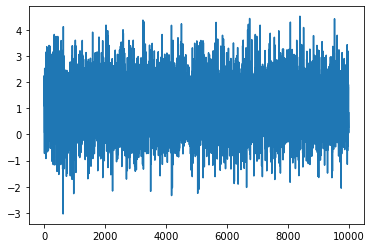

In [123]:
plt.plot(s1)
plt.savefig("s1traceplotwithoutburnin.png")
np.mean(s1)

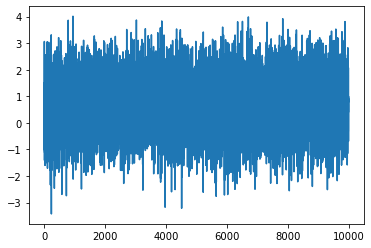

In [124]:
plt.plot(s2)
plt.savefig("s2traceplotwithoutburnin.png")

<Figure size 1080x1080 with 0 Axes>

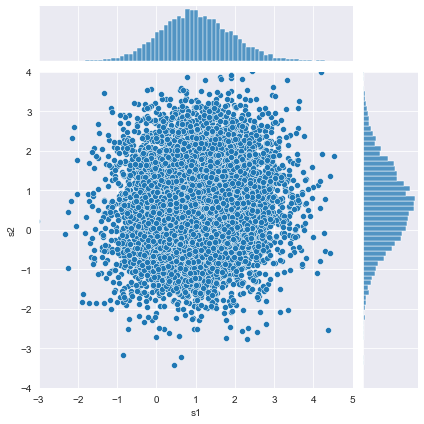

In [125]:
plt.figure(figsize=(15, 15))
sns.set_style("darkgrid")
sns.jointplot(data=experiment, x="s1", y="s2",
              xlim=(-3, 5), ylim=(-4, 4))
plt.savefig("s1s2jointplot.png")

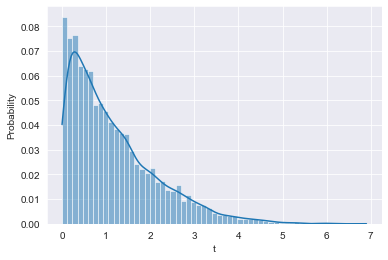

In [126]:
sns.histplot(experiment, x="t", kde=True, fill=True, stat='probability')
plt.savefig("thistogram.png")

### Trueskill representation of the skills

We will transform the samples into a gaussian. We will do this by approximating it as a gaussian.

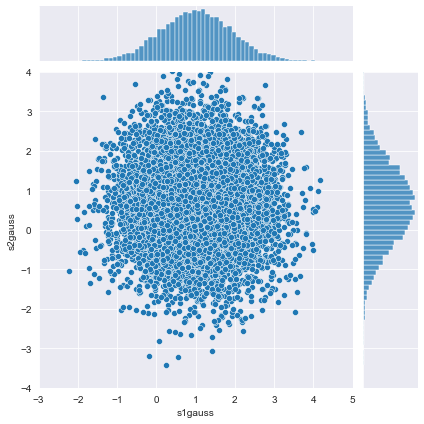

In [127]:
def gaussianApprox(samples):
    return scipy.stats.norm(loc=np.mean(samples), scale=np.std(samples))

s1gauss = gaussianApprox(experiment.s1)
s2gauss = gaussianApprox(experiment.s2)

approximation = pd.DataFrame(
    {
        "s1gauss" : s1gauss.rvs(L),
        "s2gauss" : s2gauss.rvs(L),
    }
)

sns.jointplot(data=approximation, x="s1gauss", y="s2gauss",
              xlim=(-3, 5), ylim=(-4, 4))
plt.savefig("GaussApproxJointPlot.png")

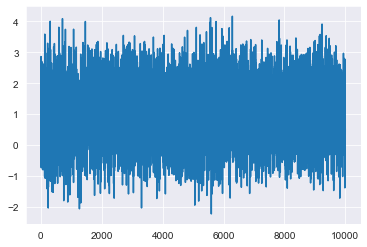

In [128]:
plt.plot(approximation.s1gauss)
plt.savefig("s1GaussApproxTraceplot.png")

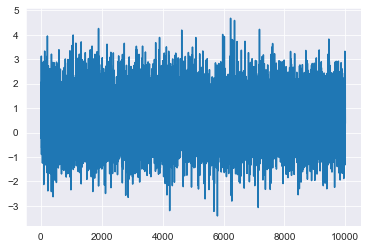

In [129]:
plt.plot(approximation.s2gauss)
plt.savefig("s1GaussApproxTraceplot.png")

### Plot histogram of samples with fitted gaussians $L=10^4$

In [130]:
# Samples
L = 10**4
burn = 50
# Priors
sigma_s = np.array([[1, 0], [0, 1]])
mu_s = np.array([1, 1])

# Sample
s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)

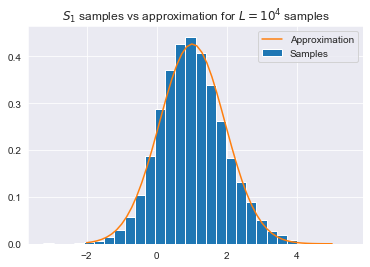

In [131]:
s1gauss = gaussianApprox(s1)
x = np.linspace(-2, 5)
plt.hist(s1, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =10^4$ samples")
plt.savefig("s1samplevsdist10000.png")

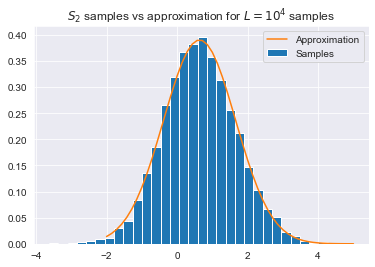

In [132]:
s2gauss = gaussianApprox(s2)
x = np.linspace(-2, 5)
plt.hist(s2, bins=30, density=True, label='Samples')
plt.plot(x, s2gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_2$ samples vs approximation for $L =10^4$ samples")
plt.savefig("s2samplevsdist10000.png")

### Plot histogram of samples with fitted gaussians $L=10^3$

In [133]:
# Samples
L = 10**3
burn = 50
# Priors
sigma_s = np.array([[1, 0], [0, 1]])
mu_s = np.array([1, 1])

# Sample
s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)

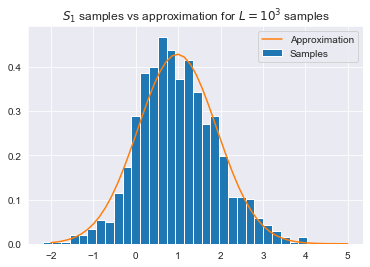

In [134]:
s1gauss = gaussianApprox(s1)
x = np.linspace(-2, 5)
plt.hist(s1, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =10^3$ samples")
plt.savefig("s1samplevsdist1000.png")

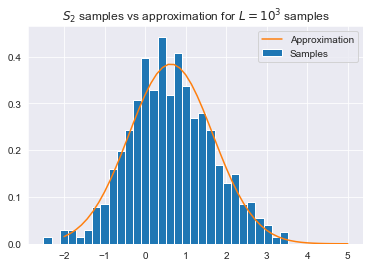

In [135]:
s2gauss = gaussianApprox(s2)
x = np.linspace(-2, 5)
plt.hist(s2, bins=30, density=True, label='Samples')
plt.plot(x, s2gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_2$ samples vs approximation for $L =10^3$ samples")
plt.savefig("s2samplevsdist1000.png")

### Plot histogram of samples with fitted gaussians $L=100$

In [136]:
# Samples
L = 100
burn = 50
# Priors
sigma_s = np.array([[1, 0], [0, 1]])
mu_s = np.array([1, 1])

# Sample
s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)

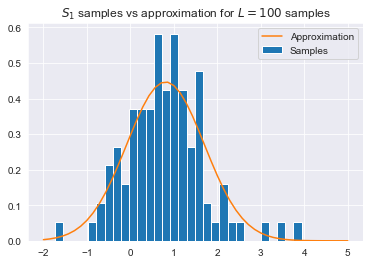

In [137]:
s1gauss = gaussianApprox(s1)
x = np.linspace(-2, 5)
plt.hist(s1, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =100$ samples")
plt.savefig("s1samplevsdist100.png")

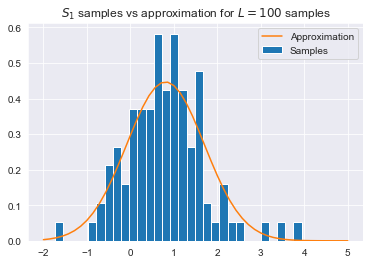

In [138]:
s2gauss = gaussianApprox(s2)
x = np.linspace(-2, 5)
plt.hist(s1, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =100$ samples")
plt.savefig("s2samplevsdist100.png")

### Plot histogram of samples with fitted gaussians $L=30$

In [139]:
# Samples
L = 30
burn = 50
# Priors
sigma_s = np.array([[1, 0], [0, 1]])
mu_s = np.array([1, 1])

# Sample
s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)

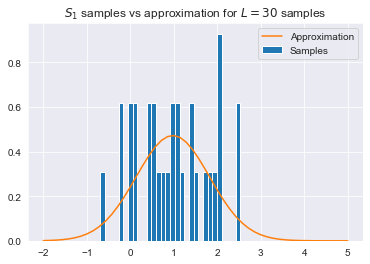

In [140]:
s1gauss = gaussianApprox(s1)
x = np.linspace(-2, 5)
plt.hist(s1, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =30$ samples")
plt.savefig("s1samplevsdist30.png")

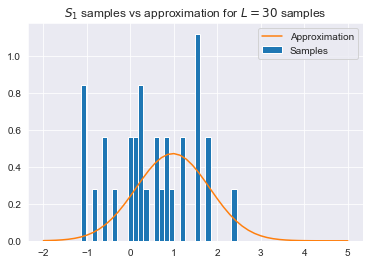

In [141]:
s2gauss = gaussianApprox(s2)
x = np.linspace(-2, 5)
plt.hist(s2, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =30$ samples")
plt.savefig("s2samplevsdist30.png")

### Compare priors with posteriors given thet $p(s|y=1)$

Our prior stated:

$$
p(s_1) = \sim N(s_1; 1, 1)
$$

$$
p(s_2) = \sim N(s_2; 1, 1)
$$

Empirically we have:

In [142]:
np.mean(s1)

0.9768689104277889

In [143]:
np.var(s1)

0.7149636596025459

In [144]:
np.mean(s2)

0.49411208529694883

In [145]:
np.var(s2)

0.880614812146212

# Question 6

Use ADF with Gibbs sampling to process the matches in theSerieAdataset and estimatethe skill of all the teams in the dataset 

In [146]:
# Read the data
data = 'datasets/SerieA.csv'
shuffle = True
serieA = pd.read_csv(data)
cleaned = serieA[serieA['score1'] != serieA['score2']]
cleaned["pred"] = 0
cleaned['true'] = np.where(cleaned['score1'] > cleaned['score2'], 1, -1)
if(shuffle):
    cleaned = cleaned.sample(frac=1).reset_index(drop=True)
cleaned

<ipython-input-146-5396bc7565c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["pred"] = 0
<ipython-input-146-5396bc7565c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['true'] = np.where(cleaned['score1'] > cleaned['score2'], 1, -1)


,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,pred,true
0,2019-02-04,21:00,Cagliari,Atalanta,0,1,0,-1
1,2018-09-17,20:30,Spal,Atalanta,2,0,0,1
2,2018-09-30,15:00,Chievo,Torino,0,1,0,-1
3,2019-03-03,15:00,Udinese,Bologna,2,1,0,1
4,2018-12-26,15:00,Cagliari,Genoa,1,0,0,1
...,...,...,...,...,...,...,...,...
267,2018-11-25,15:00,Empoli,Atalanta,3,2,0,1
268,2019-04-14,15:00,Sampdoria,Genoa,2,0,0,1
269,2018-11-04,15:00,Chievo,Sassuolo,0,2,0,-1
270,2019-03-09,20:30,Chievo,Milan,1,2,0,-1


## Add priors to all teams

In [147]:
# hyperparameters
L = 100
burn = 50
# Priors
sigma_s = np.array([[1, 0], [0, 1]], dtype=np.float64)
mu_s = np.array([1, 1], dtype=np.float64)

# Sample
s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)
s1gauss = gaussianApprox(s1)
s2gauss = gaussianApprox(s2)
teams = cleaned.team1.unique()

# Make dictionary of priors
distributions = {}

# Give all same prior
for team in teams:
    distributions[team] = s1gauss

## Update distributions based on data

In [148]:
# Update priors based on data
for index, row in cleaned.iterrows():
    if row['score1'] > row['score2']:
        # Team 1 won
        mu1 = distributions[row['team1']].mean()
        mu2 = distributions[row['team2']].mean()
        s1 = distributions[row['team1']].var()
        s2 = distributions[row['team2']].var()

        mu_s = np.array([mu1, mu2], np.float64)
        sigma_s = np.array([[s1, 0], [0, s2]], dtype=np.float64)

        # Sample
        s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)
        s1gauss = gaussianApprox(s1)
        s2gauss = gaussianApprox(s2)
        distributions[row['team1']] = s1gauss
        distributions[row['team2']] = s2gauss

    else:
        # Team 2 won
        mu1 = distributions[row['team2']].mean()
        mu2 = distributions[row['team1']].mean()
        s1 = distributions[row['team2']].var()
        s2 = distributions[row['team1']].var()

        mu_s = np.array([mu1, mu2], np.float64)
        sigma_s = np.array([[s1, 0], [0, s2]], dtype=np.float64)

        # Sample
        s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)
        s1gauss = gaussianApprox(s1)
        s2gauss = gaussianApprox(s2)
        distributions[row['team2']] = s1gauss
        distributions[row['team1']] = s2gauss


## Create a ranking table that ranks based on trueskill's conservative skill with $k=3$

In [149]:
team, cs = [], []
k = 3

for key, dist in distributions.items():
    team.append(key)
    cs.append(dist.mean() - k*dist.std())

results = pd.DataFrame(
    {
        'Team': team,
        'Conservative Skill': cs
    }
)
results = results.sort_values('Conservative Skill', ascending=False).reset_index(drop=True)
results

,Team,Conservative Skill
0,Juventus,0.209878
1,Torino,0.141249
2,Milan,-0.083799
3,Roma,-0.095842
4,Napoli,-0.438604
5,Inter,-0.472368
6,Parma,-0.856596
7,Empoli,-0.956709
8,Lazio,-0.989466
9,Bologna,-1.113951


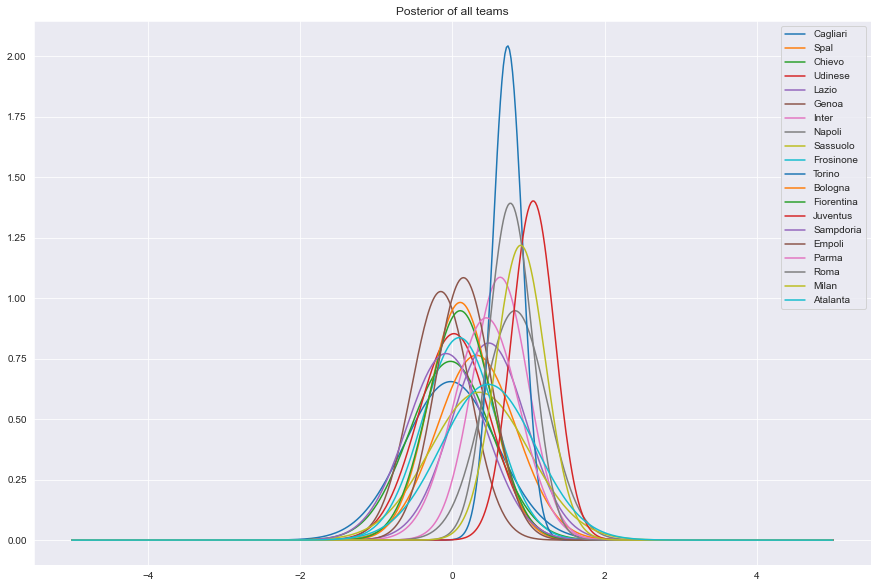

In [150]:
x = np.linspace(-5, 5, 500)

plt.figure(figsize=(15, 10))

for key, dist in distributions.items():
    plt.plot(x, dist.pdf(x), label=key)

plt.legend()
plt.title("Posterior of all teams")
plt.savefig("posteriors.png")

## Q7 Using the model for predictions



In [174]:
def winningPrediction(player1, player2, k=3):
    m1, m2 = distributions[player1].mean(), distributions[player2].mean()
    s1, s2 = distributions[player1].std(), distributions[player2].std()
    cs1, cs2 = m1 - k*s1, m2 - k*s2
    if(cs1 >= cs2):
      return 1
    else:
      return -1

## Reset Priors

In [152]:
# hyperparameters
L = 100
burn = 50

# Priors
sigma_s = np.array([[1, 0], [0, 1]], dtype=np.float64)
mu_s = np.array([1, 1], dtype=np.float64)

# Sample
s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)
s1gauss = gaussianApprox(s1)
s2gauss = gaussianApprox(s2)
teams = cleaned.team1.unique()

# Make dictionary of priors
distributions = {}

# Give all same prior
for team in teams:
    distributions[team] = s1gauss

## Calculate posterior and predict one step ahead

In [153]:
pred = []

# Update priors based on data
for index, row in cleaned.iterrows():
    if row['score1'] > row['score2']:
        # Team 1 won
        mu1 = distributions[row['team1']].mean()
        mu2 = distributions[row['team2']].mean()
        s1 = distributions[row['team1']].var()
        s2 = distributions[row['team2']].var()

        pred.append(winningPrediction(row['team1'], row['team2']))

        mu_s = np.array([mu1, mu2], np.float64)
        sigma_s = np.array([[s1, 0], [0, s2]], dtype=np.float64)

        # Sample
        s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)
        s1gauss = gaussianApprox(s1)
        s2gauss = gaussianApprox(s2)
        distributions[row['team1']] = s1gauss
        distributions[row['team2']] = s2gauss

    else:
        # Team 2 won
        mu1 = distributions[row['team2']].mean()
        mu2 = distributions[row['team1']].mean()
        s1 = distributions[row['team2']].var()
        s2 = distributions[row['team1']].var()

        pred.append(winningPrediction(row['team1'], row['team2']))

        mu_s = np.array([mu1, mu2], np.float64)
        sigma_s = np.array([[s1, 0], [0, s2]], dtype=np.float64)

        # Sample
        s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)
        s1gauss = gaussianApprox(s1)
        s2gauss = gaussianApprox(s2)
        distributions[row['team2']] = s1gauss
        distributions[row['team1']] = s2gauss

cleaned["pred"] = pred

In [154]:
true_values = np.array(cleaned.true)
predictions = np.array(cleaned.pred)
np.sum(true_values == predictions) / len(true_values)

0.6727941176470589

# Question 10. Tennis datasets

I have downloaded the tennis dataset from [ATP Wourld Tour tennis data](https://datahub.io/sports-data/atp-world-tour-tennis-data).
Let us explore this data and clean it up.

In [175]:
tennis = pd.read_csv('datasets/tennis.csv')

## Explore the features

In [176]:
tennis.columns

Index(['tourney_year_id', 'tourney_order', 'tourney_slug',
       'tourney_url_suffix', 'tourney_round_name', 'round_order',
       'match_order', 'winner_name', 'winner_player_id', 'winner_slug',
       'loser_name', 'loser_player_id', 'loser_slug', 'winner_seed',
       'loser_seed', 'match_score_tiebreaks', 'winner_sets_won',
       'loser_sets_won', 'winner_games_won', 'loser_games_won',
       'winner_tiebreaks_won', 'loser_tiebreaks_won', 'match_id',
       'match_stats_url_suffix'],
      dtype='object')

## Data Cleaning

In [177]:
# Hyperparameters
N = 15      # No of top winners we want to include
Y = 2015    # Start year (inclusive)

# Extract relevant features
features = ['tourney_year_id', 'winner_name', 'loser_name']
tennis = tennis[features]

if(tennis.tourney_year_id.dtype == 'object'):
    # convert to years  
    tennis['tourney_year_id'] = tennis['tourney_year_id'].apply(lambda x : x.split('-')[0])
    tennis['tourney_year_id'] = tennis['tourney_year_id'].astype(int)

# Extract the latest years
tennis = tennis[tennis.tourney_year_id >= Y]

# Extract the 15 players who won the most matches
winners = tennis.winner_name.value_counts()[:N].index.to_list()

# Extract matches where these players are playing eachother
topplayers = tennis[tennis.winner_name.isin(winners) & tennis.loser_name.isin(winners)]

# Add prediction column
topplayers["pred"] = 0

<ipython-input-177-68e940c14ff7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topplayers["pred"] = 0


## Run Gibbs sampler on data

In [178]:
# hyperparameters
L = 100
burn = 50
# Priors
sigma_s = np.array([[1, 0], [0, 1]], dtype=np.float64)
mu_s = np.array([1, 1], dtype=np.float64)

# Sample
s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)
s1gauss = gaussianApprox(s1)
s2gauss = gaussianApprox(s2)

# Make dictionary of priors
distributions = {}

# Give all same prior
for player in winners:
    distributions[player] = s1gauss

In [179]:
pred = []

# Update priors based on data
for index, row in topplayers.iterrows():
    pred.append(winningPrediction(row['winner_name'], row['loser_name']))
    mu1 = distributions[row['winner_name']].mean()
    mu2 = distributions[row['loser_name']].mean()
    s1 = distributions[row['winner_name']].var()
    s2 = distributions[row['loser_name']].var()

    mu_s = np.array([mu1, mu2], np.float64)
    sigma_s = np.array([[s1, 0], [0, s2]], dtype=np.float64)

    # Sample
    s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)
    s1gauss = gaussianApprox(s1)
    s2gauss = gaussianApprox(s2)
    distributions[row['winner_name']] = s1gauss
    distributions[row['loser_name']] = s2gauss

topplayers["pred"] = pred

<ipython-input-179-3b5b5e5b2047>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topplayers["pred"] = pred


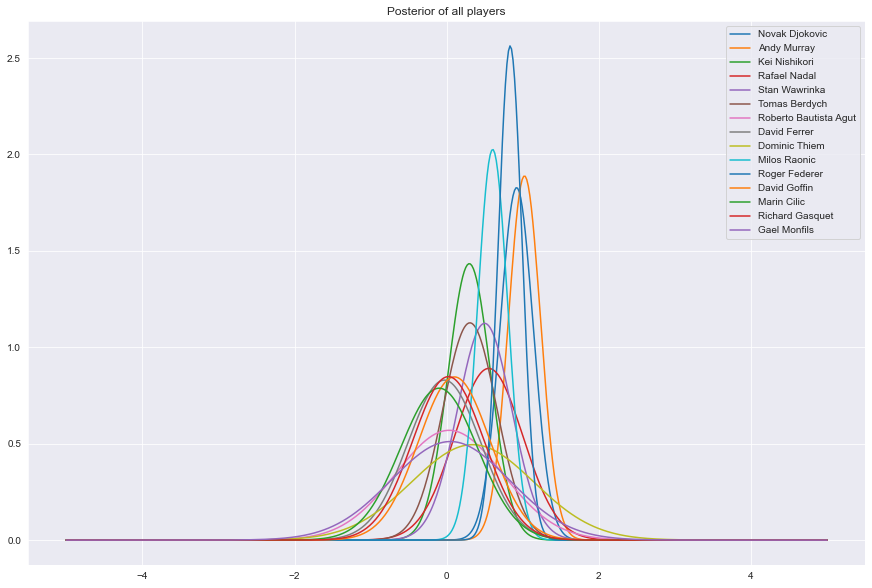

In [181]:
x = np.linspace(-5, 5, 500)

plt.figure(figsize=(15, 10))

for key, dist in distributions.items():
    plt.plot(x, dist.pdf(x), label=key)

plt.legend()
plt.title("Posterior of all players")
plt.savefig("posteriors.png")

In [182]:
team, cs = [], []
k = 3

for key, dist in distributions.items():
    team.append(key)
    cs.append(dist.mean() - k*dist.std())

results = pd.DataFrame(
    {
        'Team': team,
        'Conservative Skill': cs
    }
)
results = results.sort_values('Conservative Skill', ascending=False).reset_index(drop=True)
results

,Team,Conservative Skill
0,Andy Murray,0.388535
1,Roger Federer,0.367228
2,Novak Djokovic,0.264559
3,Milos Raonic,0.013473
4,Kei Nishikori,-0.537423
5,Stan Wawrinka,-0.566001
6,Tomas Berdych,-0.756937
7,Rafael Nadal,-0.791809
8,David Goffin,-1.313180
9,Richard Gasquet,-1.389225


In [192]:
predictions = np.array(topplayers['pred'])

print("Accuray: " + str(np.sum(predictions==1) / len(predictions)))

Accuray: 0.7090909090909091
